# Data Analysis

## Import Relevant Libraries

In [1]:
# Import Libraries

# Basic
import pandas as pd
import math

# Visualisation
from matplotlib import pyplot as plt
import seaborn as sns

# Statistical Tests
from scipy.stats import spearmanr, kruskal
from scipy.stats import skew, kurtosis

## Basic Dataset (No Additional Features)

### Import Data

In [2]:
# Import Data
df = pd.read_csv("data/sanitized_basic.csv")

In [3]:
df

,DIVISION_CODE,COUNCIL_AREA_CODE,BEAT,STATS_CLASS_CODE,GROUP,INVESTIGATION_DURATION,BIN_CLASS
0,1,Aberdeen City,AS2B,Serious Assault,1.0,0,0
1,1,Aberdeen City,AN3B,Serious Assault,1.0,0,0
2,1,Aberdeen City,AN7A,Serious Assault,1.0,1,1
3,1,Aberdeenshire,S1A,Housebreaking with intent to steal - other pro...,3.0,0,0
4,1,Aberdeen City,AN3A,Theft of motor vehicle & contents incl. taking...,3.0,0,0
...,...,...,...,...,...,...,...
2798123,3,Highland,408,"Lighting offences, motor vehicle",7.0,1,1
2798124,3,Highland,408,"Lighting offences, motor vehicle",7.0,1,1
2798125,3,Highland,67,Seat Belt Offences,7.0,0,0
2798126,3,Highland,34,Seat Belt Offences,7.0,0,0


### Univariate

c:\users\mezuah4\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


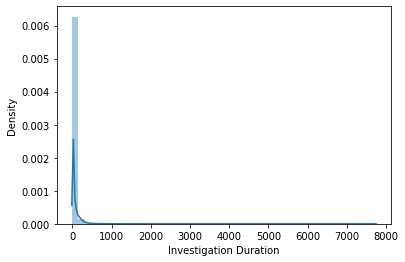

In [4]:
# Distribution of Target Variable
fig = sns.distplot(df['INVESTIGATION_DURATION'])
plt.xlabel('Investigation Duration')
plt.savefig('images/analysis/duration_dist.pdf')

c:\users\mezuah4\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


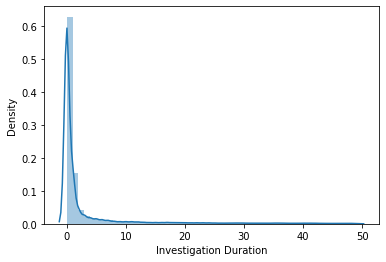

In [5]:
# Distribution of Target Variable (Truncated)
fig = sns.distplot(df['INVESTIGATION_DURATION'][df['INVESTIGATION_DURATION'] < 50])
plt.xlabel('Investigation Duration')
plt.savefig('images/analysis/duration_dist2.pdf')

In [6]:
# Descriptive Statistics of Target Variable
df['INVESTIGATION_DURATION'].describe()

count    2.798128e+06
mean     1.808404e+01
std      1.009229e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      7.736000e+03
Name: INVESTIGATION_DURATION, dtype: float64

In [7]:
# Percentage of Zero Data
zero = df['INVESTIGATION_DURATION'].where(df['INVESTIGATION_DURATION'] == 0).count()
all_data = df['INVESTIGATION_DURATION'].count()
(zero / all_data) * 100

56.5134975955353

In [8]:
# Calculate Skewness
skew(df['INVESTIGATION_DURATION'])

26.947189732957657

In [9]:
# Calculate Kurtosis
kurtosis(df['INVESTIGATION_DURATION'])

1157.2578685688288

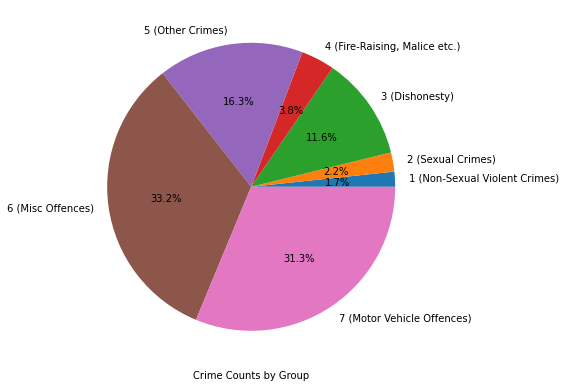

In [44]:
# Crime Count Per Group
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes((0, 0, .5, 1))
labels = ["1 (Non-Sexual Violent Crimes)", "2 (Sexual Crimes)", "3 (Dishonesty)", "4 (Fire-Raising, Malice etc.)", "5 (Other Crimes)", "6 (Misc Offences)", "7 (Motor Vehicle Offences)"]
plt.pie(df['GROUP'].value_counts(sort=False).sort_index(), labels=labels, autopct='%1.1f%%')
plt.xlabel('Crime Counts by Group')
plt.savefig("images/analysis/group_pie.pdf")
plt.show()

In [45]:
# Crime Counts By Group
df['GROUP'].value_counts(sort=False).sort_index()

1.0     47205
2.0     60228
3.0    324746
4.0    105441
5.0    457051
6.0    928748
7.0    874709
Name: GROUP, dtype: int64

In [11]:
# Total Crimes By Area (For Choropleth)
counts = df['COUNCIL_AREA_CODE'].value_counts().rename_axis("COUNCIL_AREA_CODE").to_frame("COUNT")
counts

,COUNT
COUNCIL_AREA_CODE,
Glasgow City,541035
North Lanarkshire,197171
City of Edinburgh,192439
Fife,168802
South Lanarkshire,161813
Highland,146563
Aberdeen City,133717
Dundee City,103526
Renfrewshire,101825


In [12]:
# Crime Prevalence (Crimes per 100,000 people) by Area (For Choropleth)
pops = pd.read_csv("data/estimated_populations_2020.csv")
pops = pd.merge(pops, counts, on="COUNCIL_AREA_CODE")
pops['COUNT'] = pd.to_numeric(pops['COUNT'])
pops['POPULATION'] = pd.to_numeric(pops['POPULATION'])
pops['PREVALENCE'] = pops['COUNT'] / (pops['POPULATION'] / 100000)
pops

,COUNCIL_AREA_CODE,POPULATION,COUNT,PREVALENCE
0,Aberdeen City,228670,133717,58475.969738
1,Aberdeenshire,261210,88377,33833.697025
2,Angus,116200,52531,45207.401033
3,Argyll & Bute,85870,46568,54230.814021
4,City of Edinburgh,524930,192439,36659.935610
5,Clackmannanshire,51540,27595,53540.939076
6,Dumfries & Galloway,148860,63776,42842.939675
7,Dundee City,149320,103526,69331.636753
8,East Ayrshire,122010,67460,55290.549955
9,East Dunbartonshire,108640,26514,24405.375552


In [13]:
# Division Code Overlap
df.groupby('DIVISION_CODE')['COUNCIL_AREA_CODE'].unique()

DIVISION_CODE
1                 [Aberdeen City, Aberdeenshire, Moray]
2                 [Dundee City, Angus, Perth & Kinross]
3     [Orkney Islands, Highland, Eilean Siar, Shetla...
4                 [Falkirk, Clackmannanshire, Stirling]
5         [City of Edinburgh, Midlothian, West Lothian]
6     [Midlothian, East Lothian, West Lothian, Scott...
7                                       [Fife, Falkirk]
8     [Glasgow City, East Renfrewshire, East Dunbart...
9       [East Ayrshire, South Ayrshire, North Ayrshire]
10    [North Lanarkshire, South Lanarkshire, Glasgow...
11                 [West Dunbartonshire, Argyll & Bute]
12                           [Renfrewshire, Inverclyde]
13                                [Dumfries & Galloway]
Name: COUNCIL_AREA_CODE, dtype: object

### Bivariate

In [14]:
# Mean Investigation Duration By Area (For Choropleth)
df[['INVESTIGATION_DURATION', 'COUNCIL_AREA_CODE']].groupby('COUNCIL_AREA_CODE', as_index=False).mean()

,COUNCIL_AREA_CODE,INVESTIGATION_DURATION
0,Aberdeen City,25.390167
1,Aberdeenshire,24.030528
2,Angus,11.580381
3,Argyll & Bute,9.468949
4,City of Edinburgh,26.233378
5,Clackmannanshire,19.167277
6,Dumfries & Galloway,18.796554
7,Dundee City,15.961488
8,East Ayrshire,11.968856
9,East Dunbartonshire,21.700045


In [15]:
# Median Investigation Duration By Area (For Choropleth)
df[['INVESTIGATION_DURATION', 'COUNCIL_AREA_CODE']].groupby('COUNCIL_AREA_CODE', as_index=False).median()

,COUNCIL_AREA_CODE,INVESTIGATION_DURATION
0,Aberdeen City,0.0
1,Aberdeenshire,0.0
2,Angus,0.0
3,Argyll & Bute,0.0
4,City of Edinburgh,1.0
5,Clackmannanshire,0.0
6,Dumfries & Galloway,0.0
7,Dundee City,0.0
8,East Ayrshire,0.0
9,East Dunbartonshire,1.0


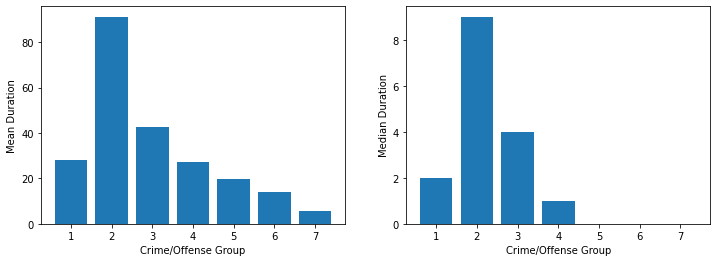

In [16]:
# Effect of Crime Group on Investigation Duration
mean_group = df.groupby('GROUP', as_index=False)['INVESTIGATION_DURATION'].mean()
median_group = df.groupby('GROUP', as_index=False)['INVESTIGATION_DURATION'].median()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(height = mean_group['INVESTIGATION_DURATION'], x = range(1, len(mean_group) + 1))
ax[0].set_xlabel('Crime/Offense Group')
ax[0].set_ylabel('Mean Duration')

ax[1].bar(height = median_group['INVESTIGATION_DURATION'], x = range(1, len(median_group) + 1))
ax[1].set_xlabel('Crime/Offense Group')
ax[1].set_ylabel('Median Duration')

plt.savefig("images/analysis/average_group.pdf")
plt.show()

In [17]:
# Mean Duration by Group
mean_group

,GROUP,INVESTIGATION_DURATION
0,1.0,27.880924
1,2.0,91.160988
2,3.0,42.563123
3,4.0,27.236673
4,5.0,19.920886
5,6.0,14.204009
6,7.0,5.492128


In [18]:
# Median Duration by Group
median_group

,GROUP,INVESTIGATION_DURATION
0,1.0,2.0
1,2.0,9.0
2,3.0,4.0
3,4.0,1.0
4,5.0,0.0
5,6.0,0.0
6,7.0,0.0


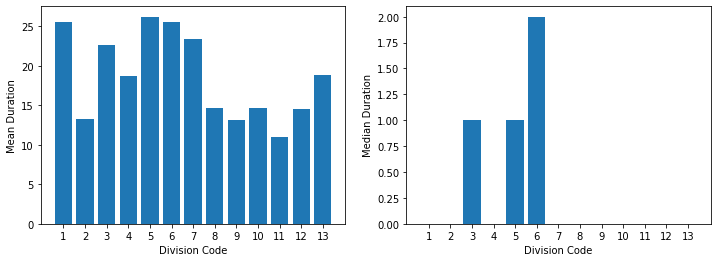

In [19]:
# Effect of Division Code on Investigation Duration
mean_div = df.groupby('DIVISION_CODE', as_index=False)['INVESTIGATION_DURATION'].mean()
median_div = df.groupby('DIVISION_CODE', as_index=False)['INVESTIGATION_DURATION'].median()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(height = mean_div['INVESTIGATION_DURATION'], x = mean_div['DIVISION_CODE'])
ax[0].set_xlabel('Division Code')
ax[0].set_ylabel('Mean Duration')
ax[0].set_xticks(range(1, 14))

ax[1].bar(height = median_div['INVESTIGATION_DURATION'], x = median_div['DIVISION_CODE'])
ax[1].set_xlabel('Division Code')
ax[1].set_ylabel('Median Duration')
ax[1].set_xticks(range(1, 14))

plt.savefig("images/analysis/average_division.pdf")
plt.show()

In [20]:
# Mean Duration by Division
mean_div

,DIVISION_CODE,INVESTIGATION_DURATION
0,1,25.613743
1,2,13.271594
2,3,22.651477
3,4,18.770681
4,5,26.236741
5,6,25.590141
6,7,23.455241
7,8,14.675471
8,9,13.114846
9,10,14.707905


In [21]:
# Median Duration by Division
median_div

,DIVISION_CODE,INVESTIGATION_DURATION
0,1,0.0
1,2,0.0
2,3,1.0
3,4,0.0
4,5,1.0
5,6,2.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0


### Descriptive Summary of Categories

In [22]:
# DIVISION_CODE
df_div = df.groupby('DIVISION_CODE')['INVESTIGATION_DURATION'].describe()
df_div['IQR'] = df_div['75%'] - df_div['25%']
df_div.sort_values(by='IQR', ascending=False).reset_index()

,DIVISION_CODE,count,mean,std,min,25%,50%,75%,max,IQR
0,6,161031.0,25.590141,109.708635,0.0,0.0,2.0,14.0,7715.0,14.0
1,5,192447.0,26.236741,126.821187,0.0,0.0,1.0,11.0,7471.0,11.0
2,1,256008.0,25.613743,134.859036,0.0,0.0,0.0,10.0,7269.0,10.0
3,7,168803.0,23.455241,143.044190,0.0,0.0,0.0,8.0,6557.0,8.0
4,3,171719.0,22.651477,84.835244,0.0,0.0,1.0,7.0,4184.0,7.0
5,4,161020.0,18.770681,81.056443,0.0,0.0,0.0,5.0,6380.0,5.0
6,9,196271.0,13.114846,75.744880,0.0,0.0,0.0,2.0,6087.0,2.0
7,13,63776.0,18.796554,116.040167,0.0,0.0,0.0,2.0,7558.0,2.0
8,8,589593.0,14.675471,81.226099,0.0,0.0,0.0,1.0,5813.0,1.0
9,10,358962.0,14.707905,88.214347,0.0,0.0,0.0,1.0,6647.0,1.0


In [23]:
# COUNCIL_AREA_CODE
df_stats = df.groupby('COUNCIL_AREA_CODE')['INVESTIGATION_DURATION'].describe()
df_stats['IQR'] = df_stats['75%'] - df_stats['25%']
df_stats.sort_values(by='IQR', ascending=False).reset_index()

,COUNCIL_AREA_CODE,count,mean,std,min,25%,50%,75%,max,IQR
0,West Lothian,61593.0,28.843083,129.998459,0.0,0.0,2.0,15.0,6799.0,15.0
1,East Lothian,30626.0,25.299190,100.812319,0.0,0.0,2.0,15.0,7715.0,15.0
2,Moray,33914.0,30.620982,161.675771,0.0,0.0,1.0,15.0,5997.0,15.0
3,Midlothian,34887.0,23.424714,81.333928,0.0,0.0,2.0,14.0,4608.0,14.0
4,Scottish Borders,33933.0,22.193735,102.178446,0.0,0.0,2.0,11.0,5662.0,11.0
5,City of Edinburgh,192439.0,26.233378,126.819261,0.0,0.0,1.0,11.0,7471.0,11.0
6,Shetland Islands,9003.0,22.730867,64.638458,0.0,0.0,1.0,10.0,820.0,10.0
7,Aberdeenshire,88377.0,24.030528,114.430974,0.0,0.0,0.0,10.0,6501.0,10.0
8,Aberdeen City,133717.0,25.390167,139.743040,0.0,0.0,0.0,9.0,7269.0,9.0
9,Fife,168802.0,23.454965,143.044569,0.0,0.0,0.0,8.0,6557.0,8.0


In [24]:
# BEAT
df_beat = df.groupby('BEAT')['INVESTIGATION_DURATION'].describe()
df_beat['IQR'] = df_beat['75%'] - df_beat['25%']
df_beat.sort_values(by='IQR', ascending=False).reset_index()

,BEAT,count,mean,std,min,25%,50%,75%,max,IQR
0,N1G,3.0,1913.000000,3271.069703,0.0,24.5,49.0,2869.5,5690.0,2845.0
1,B3B,3.0,5443.333333,1549.288977,4159.0,4583.0,5007.0,6085.5,7164.0,1502.5
2,B8A,3.0,5346.666667,1632.746561,4404.0,4404.0,4404.0,5818.0,7232.0,1414.0
3,C3C,3.0,5363.000000,552.524208,5044.0,5044.0,5044.0,5522.5,6001.0,478.5
4,C2H,2.0,6514.000000,470.933116,6181.0,6347.5,6514.0,6680.5,6847.0,333.0
...,...,...,...,...,...,...,...,...,...,...
1401,203,19.0,10.526316,30.786665,0.0,0.0,0.0,0.0,130.0,0.0
1402,LM3B,2.0,15.000000,0.000000,15.0,15.0,15.0,15.0,15.0,0.0
1403,202,102.0,8.362745,39.556900,0.0,0.0,0.0,0.0,305.0,0.0
1404,20,3383.0,6.391664,34.863941,0.0,0.0,0.0,0.0,1029.0,0.0


In [25]:
# STATS_CLASS_CODE
df_stats = df.groupby('STATS_CLASS_CODE')['INVESTIGATION_DURATION'].describe().reset_index()
df_stats['IQR'] = df_stats['75%'] - df_stats['25%']
df_stats.sort_values(by='IQR', ascending=False)

,STATS_CLASS_CODE,count,mean,std,min,25%,50%,75%,max,IQR
167,Investment legislation,3.0,667.333333,1049.464784,0.0,62.5,125.0,1001.00,1877.0,938.50
71,Corruption,46.0,275.086957,223.959503,0.0,20.0,287.0,517.00,517.0,497.00
24,Bigamy,8.0,228.375000,198.495007,8.0,49.0,207.5,386.25,525.0,337.25
170,Legal Aid and advice legislation,16.0,206.125000,278.724446,0.0,0.0,87.0,294.00,825.0,294.00
40,Bringing drugs into prison,745.0,191.292617,240.247677,0.0,1.0,134.0,287.00,1635.0,286.00
...,...,...,...,...,...,...,...,...,...,...
110,Drunk or dinking in unlicensed premises,3.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.00
214,Other Speeding Offences,124870.0,0.784616,11.388532,0.0,0.0,0.0,0.00,3275.0,0.00
211,Official Secrets Acts,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0,0.00
67,Contravn of sec 6_1 by contng to operate prosc...,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0,0.00


In [26]:
# GROUP
df_group = df.groupby('GROUP')['INVESTIGATION_DURATION'].describe()
df_group['IQR'] = df_group['75%'] - df_group['25%']
df_group.sort_values(by='IQR', ascending=False).reset_index()

,GROUP,count,mean,std,min,25%,50%,75%,max,IQR
0,2.0,60228.0,91.160988,338.370746,0.0,1.0,9.0,65.0,7736.0,64.0
1,3.0,324746.0,42.563123,141.308315,0.0,0.0,4.0,35.0,6847.0,35.0
2,4.0,105441.0,27.236673,132.724530,0.0,0.0,1.0,15.0,7269.0,15.0
3,1.0,47205.0,27.880924,160.038752,0.0,0.0,2.0,11.0,5975.0,11.0
4,6.0,928748.0,14.204009,93.697340,0.0,0.0,0.0,3.0,6799.0,3.0
5,5.0,457051.0,19.920886,71.466864,0.0,0.0,0.0,2.0,5502.0,2.0
6,7.0,874709.0,5.492128,31.748155,0.0,0.0,0.0,0.0,3762.0,0.0


### Statistical Tests

In [27]:
# Division Code
div_codes = df.groupby('DIVISION_CODE')['INVESTIGATION_DURATION'].apply(list)
kruskal(*div_codes)

KruskalResult(statistic=108004.35608347654, pvalue=0.0)

In [28]:
# Council Area Code
council_codes = df.groupby('COUNCIL_AREA_CODE')['INVESTIGATION_DURATION'].apply(list)
kruskal(*council_codes)

KruskalResult(statistic=112602.11965985269, pvalue=0.0)

In [29]:
# Group
group_codes = df.groupby('GROUP')['INVESTIGATION_DURATION'].apply(list)
kruskal(*group_codes)

KruskalResult(statistic=360120.8220575557, pvalue=0.0)

# Additional Features

## Import Data

In [30]:
# Import Data
df2 = pd.read_csv("data/sanitized_additional.csv")
df2

,DIVISION_CODE,COUNCIL_AREA_CODE,BEAT,STATS_CLASS_CODE,GROUP,OCCUR_RANGE,REPORT_DELAY,INVESTIGATION_DURATION,BIN_CLASS
0,1,Aberdeen City,AS2B,Serious Assault,1.0,0,0,0,0
1,1,Aberdeen City,AN3B,Serious Assault,1.0,0,0,0,0
2,1,Aberdeen City,AN7A,Serious Assault,1.0,0,0,1,1
3,1,Aberdeenshire,S1A,Housebreaking with intent to steal - other pro...,3.0,0,0,0,0
4,1,Aberdeen City,AN3A,Theft of motor vehicle & contents incl. taking...,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2625959,10,South Lanarkshire,QC55,Seat Belt Offences,7.0,0,0,0,0
2625960,5,City of Edinburgh,SE41,"Motor Vehicles, Other Offences",7.0,0,1,0,0
2625961,1,Aberdeen City,AN6C,"Motor Vehicles, Other Offences",7.0,0,50,2,1
2625962,5,City of Edinburgh,NW29,"Motor Vehicles, Other Offences",7.0,0,1,0,0


## Bivariate

### Descriptive

In [31]:
# Logarithmic Transformation (Add 1 to stop log(0))
def log_transform(cell):
    return math.log(cell + 1)

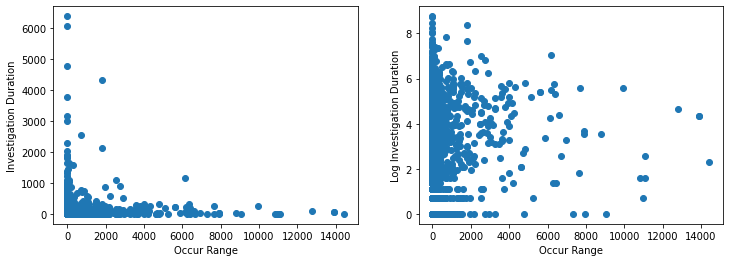

In [32]:
# Occur Range
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(df2['OCCUR_RANGE'][::100], df2['INVESTIGATION_DURATION'][::100])
ax[0].set_ylabel("Investigation Duration")
ax[0].set_xlabel("Occur Range")

ax[1].scatter(df2['OCCUR_RANGE'][::100], df2['INVESTIGATION_DURATION'].apply(log_transform)[::100])
ax[1].set_ylabel("Log Investigation Duration")
ax[1].set_xlabel("Occur Range")

plt.savefig('images/analysis/occur_corr.pdf')
plt.show()

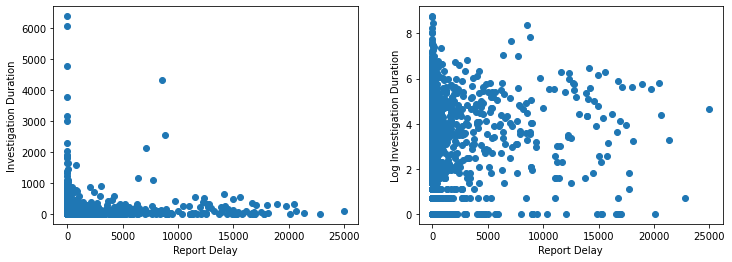

In [33]:
# Occur Range
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(df2['REPORT_DELAY'][::100], df2['INVESTIGATION_DURATION'][::100])
ax[0].set_ylabel("Investigation Duration")
ax[0].set_xlabel("Report Delay")

ax[1].scatter(df2['REPORT_DELAY'][::100], df2['INVESTIGATION_DURATION'].apply(log_transform)[::100])
ax[1].set_ylabel("Log Investigation Duration")
ax[1].set_xlabel("Report Delay")

plt.savefig('images/analysis/delay_corr.pdf')
plt.show()

### Statistical Tests

In [34]:
# Occur Range Spearman
coef, p_val = spearmanr(df2['OCCUR_RANGE'], df2['INVESTIGATION_DURATION'])
print("Coefficient: ", coef, " P-Value: ", p_val)

Coefficient:  0.22675515200578603  P-Value:  0.0


In [35]:
# Report Delay Spearman
coef, p_val = spearmanr(df2['REPORT_DELAY'], df2['INVESTIGATION_DURATION'])
print("Coefficient: ", coef, " P-Value: ", p_val)

Coefficient:  0.1845529289790006  P-Value:  0.0
